In [2]:
from utilities.molecule import Molecule, Element
from utilities.periodic_table import get_periodic_table
from utilities.SIMS_Spectra_class import SIMS_Spectra
import numpy as np
import pandas as pd
import os
import shutil
import re
from scipy.ndimage import gaussian_filter1d
import plotly.graph_objects as go
from pybaselines import Baseline
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter)

In [3]:
positive_filename_list = []
negative_filename_list = []
directory_name = "spectrum txt cleaned"
for filename in os.listdir(directory_name):
    if re.match("P_", filename):
        positive_filename_list.append(os.path.join(directory_name, filename))
    elif re.match("N_", filename):
        negative_filename_list.append(os.path.join(directory_name, filename))
positive_filename_list.sort(reverse=True)
negative_filename_list.sort(reverse=True)

In [6]:
single_element = ["H", "K", "Na", "Cu", "Zn", "Al", "CH3", "C2H5"]
other_elements = []
spectra = SIMS_Spectra("spectrum txt cleaned/P_Ru-Pt-Pd_Bi5_1.txt",
                       single_other_component = single_element,
                       indice_max=10,
                       components= ["Ru"],
                       max_molecules=4,
                       other_elements= other_elements,
                       mode="nnls")


Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd_Bi5_1.txt'

Creation of the Isotope DataFrame with ['Ru'] up to 10 indices for the mz range of 0 to 1800


100%|██████████| 18/18 [00:00<00:00, 116.96it/s]


Isotope DataFrame created, 18 isotopes considered for quantification
Quantification done --> 15 molecules out of 18 where quantified in the spectra
Residual of the fit: 50090

----------------------------------------------------------------------------------------------


In [7]:
spectra.plot_results(plot_computed_pectra=True)

# Creation of the DataFrame changing the components with the compositon of the sample

In [22]:
single_element = ["H", "K", "Na", "Cu", "Zn", "Al", "CH3", "C2H5"]
other_elements = []

# ----------DF 1 : DONE WITH my C++ NNLS_admm FUNCTION ------------
# ----------DF 2 : DONE WITH SCIPY NNLS FUNCTION ------------
# ----------DF 3 : DONE WITH SCIPY NNLS FUNCTION imax = 5,  molmax = 4------------
# Creation of a dict holding all the isotopes lists and isotope dfs to avoid to compute them each time 
isotope_df_dict = {"Ru":None,
                   "Ru-Pt":None,
                   "Ru-Pd":None,
                   "Ru-Ir":None,
                   "Ru-Rh":None,
                   "Ru-Pt-Pd":None,
                   "Ru-Pt-Pd-Ir":None,
                   "Ru-Pt-Pd-Ir-Rh": None,
                   "HEA19": None,
                   "HEA 1.2": None}

df_all = pd.DataFrame()
for path in positive_filename_list:
    sample_name_index = np.where(["_"+x+"_" in path for x in isotope_df_dict.keys()])[0].item()
    sample_name = list(isotope_df_dict.keys())[sample_name_index]
    
    if sample_name == "HEA19" or sample_name == "HEA 1.2":
        sample_name = "Ru-Pt-Pd-Ir-Rh"
    sample_components = sample_name.split("-")

    if isotope_df_dict.get(sample_name) is None :
        spectra = SIMS_Spectra(path,
                                components = sample_components, 
                                single_other_component= single_element,
                                other_elements=other_elements,
                                indice_max=5,
                                max_molecules=4,
                                highest_peak_mz=1800)
        df = spectra.get_output_df()
        isotope_df_dict[sample_name] = (spectra.isotopes, spectra.isotopes_df)
    
    else : 
        sample_isotopes = isotope_df_dict.get(sample_name)[0]
        sample_isotope_df = isotope_df_dict.get(sample_name)[1]
        spectra = SIMS_Spectra(path,
                               single_other_component= single_element,
                               other_elements= other_elements,
                               indice_max=5,
                               max_molecules=4,
                               isotopes_df=sample_isotope_df,
                               isotopes=sample_isotopes,
                               highest_peak_mz=1800)
        df = spectra.get_output_df()
    
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all.fillna(0, inplace=True)

# Remove Columns where the quantification value is 0 for all the samples
df_all_cleaned = df_all.loc[:,(df_all !=0).any().values]
df_all_cleaned.to_csv('8sample_automatic_positive4_data.csv', index=False)


Spectra loaded from 'spectrum txt cleaned/P_Ru_Bi5_3.txt'

Creation of the Isotope DataFrame with ['Ru'] up to 5 indices for the mz range of 0 to 1800


100%|██████████| 13/13 [00:00<00:00, 385.44it/s]



Isotope DataFrame created, 13 isotopes considered for quantification
Quantification done --> 13 molecules out of 13 where quantified in the spectra
Residual of the fit: 26197

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru_Bi5_2.txt'

Quantification done --> 13 molecules out of 13 where quantified in the spectra
Residual of the fit: 34957

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru_Bi5_1.txt'

Quantification done --> 13 molecules out of 13 where quantified in the spectra
Residual of the fit: 34442

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru_Bi3_1.txt'

isotope df of shape (3598, 14) does not match with bin_mz array of shape (1816,)...
Isotope df reshaped to (1816, 13) 
Quantification done --> 1

100%|██████████| 43/43 [00:00<00:00, 268.48it/s]



Isotope DataFrame created, 43 isotopes considered for quantification
Quantification done --> 29 molecules out of 43 where quantified in the spectra
Residual of the fit: 173030

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Rh_Bi5_4.txt'

Quantification done --> 30 molecules out of 43 where quantified in the spectra
Residual of the fit: 174912

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Rh_Bi5_3.txt'

Quantification done --> 31 molecules out of 43 where quantified in the spectra
Residual of the fit: 206236

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Rh_Bi5_2.txt'

Quantification done --> 33 molecules out of 43 where quantified in the spectra
Residual of the fit: 246136

------------------------

100%|██████████| 43/43 [00:00<00:00, 92.85it/s] 



Isotope DataFrame created, 43 isotopes considered for quantification
Quantification done --> 37 molecules out of 43 where quantified in the spectra
Residual of the fit: 116433

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt_Bi5_4.txt'

Quantification done --> 37 molecules out of 43 where quantified in the spectra
Residual of the fit: 155095

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt_Bi5_3.txt'

Quantification done --> 37 molecules out of 43 where quantified in the spectra
Residual of the fit: 478291

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt_Bi5_2.txt'

Quantification done --> 37 molecules out of 43 where quantified in the spectra
Residual of the fit: 188981

------------------------

100%|██████████| 217/217 [00:05<00:00, 39.27it/s]



Isotope DataFrame created, 217 isotopes considered for quantification
Quantification done --> 89 molecules out of 217 where quantified in the spectra
Residual of the fit: 36370

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd_Bi5_4.txt'

Quantification done --> 85 molecules out of 217 where quantified in the spectra
Residual of the fit: 31012

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd_Bi5_3.txt'

Quantification done --> 86 molecules out of 217 where quantified in the spectra
Residual of the fit: 468409

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd_Bi5_2.txt'

Quantification done --> 89 molecules out of 217 where quantified in the spectra
Residual of the fit: 44644

-------------

100%|██████████| 943/943 [00:30<00:00, 30.82it/s] 



Isotope DataFrame created, 943 isotopes considered for quantification
Quantification done --> 169 molecules out of 943 where quantified in the spectra
Residual of the fit: 17956

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd-Ir_Bi5_4.txt'

isotope df of shape (3599, 944) does not match with bin_mz array of shape (3598,)...
Isotope df reshaped to (3598, 943) 
Quantification done --> 174 molecules out of 943 where quantified in the spectra
Residual of the fit: 29352

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd-Ir_Bi5_3.txt'

Quantification done --> 171 molecules out of 943 where quantified in the spectra
Residual of the fit: 38376

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd-Ir_B

100%|██████████| 3361/3361 [02:15<00:00, 24.77it/s]



Isotope DataFrame created, 3361 isotopes considered for quantification
Quantification done --> 386 molecules out of 3361 where quantified in the spectra
Residual of the fit: 29981

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd-Ir-Rh_Bi5_2.txt'

Quantification done --> 408 molecules out of 3361 where quantified in the spectra
Residual of the fit: 26200

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd-Ir-Rh_Bi5_1.txt'

Quantification done --> 385 molecules out of 3361 where quantified in the spectra
Residual of the fit: 25374

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pt-Pd-Ir-Rh_Bi3_1.txt'

isotope df of shape (3598, 3362) does not match with bin_mz array of shape (1807,)...
Isotope df 

100%|██████████| 43/43 [00:00<00:00, 108.71it/s]



Isotope DataFrame created, 43 isotopes considered for quantification
Quantification done --> 29 molecules out of 43 where quantified in the spectra
Residual of the fit: 28871

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pd_Bi5_4.txt'

Quantification done --> 30 molecules out of 43 where quantified in the spectra
Residual of the fit: 38820

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pd_Bi5_3.txt'

isotope df of shape (3600, 44) does not match with bin_mz array of shape (3599,)...
Isotope df reshaped to (3599, 43) 
Quantification done --> 29 molecules out of 43 where quantified in the spectra
Residual of the fit: 46699

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Pd_Bi5_2.txt'

Quantification d

100%|██████████| 43/43 [00:00<00:00, 246.51it/s]


Isotope DataFrame created, 43 isotopes considered for quantification
Quantification done --> 40 molecules out of 43 where quantified in the spectra
Residual of the fit: 71118

----------------------------------------------------------------------------------------------



Spectra loaded from 'spectrum txt cleaned/P_Ru-Ir_Bi5_4.txt'

isotope df of shape (3600, 44) does not match with bin_mz array of shape (3601,)...
bin_mz array reshaped to (3600,) 
Quantification done --> 40 molecules out of 43 where quantified in the spectra
Residual of the fit: 82570

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Ir_Bi5_3.txt'

Quantification done --> 40 molecules out of 43 where quantified in the spectra
Residual of the fit: 138937

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/P_Ru-Ir_Bi5_2.txt'

isotope df of shape (3600, 44) does not match with bin_mz array of shape (3601,)...
bin_mz array reshaped to (3600,) 
Quantification done --> 40 molecules out of 43 where quantified in the spectra
Residual of the fit: 157307

--------------------------------------------------------------

In [3]:
single_element = ["H", "O", "OH", "Cl", "Cu", "Zn", "Al", "CH3", "C2H"]
other_elements = ["O"]

# ----------DONE WITH my C++ NNLS_admm FUNCTION ------------
# Creation of a dict holding all the isotopes lists and isotope dfs to avoid to compute them each time 
isotope_df_dict = {"Ru":None,
                   "Ru-Pt":None,
                   "Ru-Pd":None,
                   "Ru-Ir":None,
                   "Ru-Rh":None,
                   "Ru-Pt-Pd":None,
                   "Ru-Pt-Pd-Ir":None,
                   "Ru-Pt-Pd-Ir-Rh": None,
                   "HEA19": None,
                   "HEA 1.2": None}
df_all = pd.DataFrame()

for path in negative_filename_list:
    sample_name_index = np.where(["_"+x+"_" in path for x in isotope_df_dict.keys()])[0].item()
    sample_name = list(isotope_df_dict.keys())[sample_name_index]

    if isotope_df_dict.get(sample_name) is None :
        if sample_name == "HEA19" or sample_name == "HEA 1.2":
            sample_components = ["Ru", "Rh", "Pd", "Pt", "Ir"]
        else : 
            sample_components = sample_name.split("-")

        spectra = SIMS_Spectra(path,
                                components = sample_components, 
                                single_other_component= single_element,
                                other_elements=other_elements,
                                indice_max=4,
                                max_molecules=2)
        df = spectra.get_output_df()
        isotope_df_dict[sample_name] = (spectra.isotopes, spectra.isotopes_df)
    
    else : 
        sample_isotopes = isotope_df_dict.get(sample_name)[0]
        sample_isotope_df = isotope_df_dict.get(sample_name)[1]
        spectra = SIMS_Spectra(path,
                               single_other_component= single_element,
                               other_elements= other_elements,
                               indice_max=4,
                               max_molecules=2,
                               isotopes_df=sample_isotope_df,
                               isotopes=sample_isotopes)
        df = spectra.get_output_df()
    
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all.fillna(0, inplace=True)

# Remove Columns where the quantification value is 0 for all the samples
df_all_cleaned = df_all.loc[:,(df_all !=0).any().values]
#df_all_cleaned.to_csv('8sample_automatic_negative_data.csv', index=False)


Spectra loaded from 'spectrum txt cleaned/N_Ru_Bi5_3.txt'

Creation of the Isotope DataFrame with ['Ru'] up to 5 indices for the mz range of 0 to 1800


100%|██████████| 43/43 [00:00<00:00, 286.23it/s]


Isotope DataFrame created, 43 isotopes considered for quantification


Quantification done --> 42 molecules out of 43 where quantified in the spectra
Residual of the fit: 88497

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru_Bi5_2.txt'

Quantification done --> 43 molecules out of 43 where quantified in the spectra
Residual of the fit: 103181

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru_Bi5_1.txt'

Quantification done --> 43 molecules out of 43 where quantified in the spectra
Residual of the fit: 90806

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru_Bi3_1.txt'

isotope df of shape (3598, 44) does not match with bin_mz array of shape (1762,)...
Isotope df reshaped to (1762, 43) 
Quantification done --> 43 molecules out of 43 where quantified in the spectra
Residual of the

100%|██████████| 98/98 [00:00<00:00, 250.69it/s]



Isotope DataFrame created, 98 isotopes considered for quantification
Quantification done --> 81 molecules out of 98 where quantified in the spectra
Residual of the fit: 244739

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Rh_Bi5_4.txt'

Quantification done --> 83 molecules out of 98 where quantified in the spectra
Residual of the fit: 197116

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Rh_Bi5_3.txt'

Quantification done --> 85 molecules out of 98 where quantified in the spectra
Residual of the fit: 201958

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Rh_Bi5_2.txt'

Quantification done --> 82 molecules out of 98 where quantified in the spectra
Residual of the fit: 178855

------------------------

100%|██████████| 98/98 [00:00<00:00, 138.86it/s]



Isotope DataFrame created, 98 isotopes considered for quantification
Quantification done --> 97 molecules out of 98 where quantified in the spectra
Residual of the fit: 150655

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt_Bi5_4.txt'

Quantification done --> 96 molecules out of 98 where quantified in the spectra
Residual of the fit: 113810

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt_Bi5_3.txt'

isotope df of shape (3600, 99) does not match with bin_mz array of shape (3599,)...
Isotope df reshaped to (3599, 98) 
Quantification done --> 98 molecules out of 98 where quantified in the spectra
Residual of the fit: 170726

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt_Bi5_2.txt'

Quantificatio

100%|██████████| 178/178 [00:01<00:00, 114.48it/s]



Isotope DataFrame created, 178 isotopes considered for quantification
Quantification done --> 133 molecules out of 178 where quantified in the spectra
Residual of the fit: 131261

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd_Bi5_4.txt'

Quantification done --> 146 molecules out of 178 where quantified in the spectra
Residual of the fit: 175296

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd_Bi5_3.txt'

Quantification done --> 135 molecules out of 178 where quantified in the spectra
Residual of the fit: 197005

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd_Bi5_2.txt'

Quantification done --> 141 molecules out of 178 where quantified in the spectra
Residual of the fit: 160219

------

100%|██████████| 282/282 [00:02<00:00, 130.43it/s]



Isotope DataFrame created, 282 isotopes considered for quantification
Quantification done --> 222 molecules out of 282 where quantified in the spectra
Residual of the fit: 203298

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd-Ir_Bi5_4.txt'

Quantification done --> 220 molecules out of 282 where quantified in the spectra
Residual of the fit: 209049

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd-Ir_Bi5_3.txt'

Quantification done --> 221 molecules out of 282 where quantified in the spectra
Residual of the fit: 197839

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd-Ir_Bi5_2.txt'

isotope df of shape (3598, 283) does not match with bin_mz array of shape (3597,)...
Isotope df reshaped to

100%|██████████| 412/412 [00:03<00:00, 133.15it/s]



Isotope DataFrame created, 412 isotopes considered for quantification
Quantification done --> 251 molecules out of 412 where quantified in the spectra
Residual of the fit: 115292

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd-Ir-Rh_Bi5_2.txt'

Quantification done --> 265 molecules out of 412 where quantified in the spectra
Residual of the fit: 125588

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd-Ir-Rh_Bi5_1.txt'

Quantification done --> 239 molecules out of 412 where quantified in the spectra
Residual of the fit: 115298

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pt-Pd-Ir-Rh_Bi3_1.txt'

isotope df of shape (3598, 413) does not match with bin_mz array of shape (1780,)...
Isotope df re

100%|██████████| 98/98 [00:00<00:00, 137.91it/s]



Isotope DataFrame created, 98 isotopes considered for quantification
Quantification done --> 80 molecules out of 98 where quantified in the spectra
Residual of the fit: 147905

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pd_Bi5_4.txt'

Quantification done --> 80 molecules out of 98 where quantified in the spectra
Residual of the fit: 152546

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pd_Bi5_3.txt'

Quantification done --> 75 molecules out of 98 where quantified in the spectra
Residual of the fit: 165010

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Pd_Bi5_2.txt'

Quantification done --> 83 molecules out of 98 where quantified in the spectra
Residual of the fit: 111754

------------------------

100%|██████████| 98/98 [00:00<00:00, 237.38it/s]



Isotope DataFrame created, 98 isotopes considered for quantification
Quantification done --> 98 molecules out of 98 where quantified in the spectra
Residual of the fit: 202963

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Ir_Bi5_4.txt'

Quantification done --> 98 molecules out of 98 where quantified in the spectra
Residual of the fit: 371534

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Ir_Bi5_3.txt'

Quantification done --> 97 molecules out of 98 where quantified in the spectra
Residual of the fit: 283043

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_Ru-Ir_Bi5_2.txt'

Quantification done --> 98 molecules out of 98 where quantified in the spectra
Residual of the fit: 351255

------------------------

100%|██████████| 412/412 [00:02<00:00, 151.45it/s]



Isotope DataFrame created, 412 isotopes considered for quantification
Quantification done --> 320 molecules out of 412 where quantified in the spectra
Residual of the fit: 149392

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_HEA19_Bi5_2.txt'

Quantification done --> 308 molecules out of 412 where quantified in the spectra
Residual of the fit: 180216

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_HEA19_Bi5_1.txt'

Quantification done --> 323 molecules out of 412 where quantified in the spectra
Residual of the fit: 191321

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_HEA19_Bi3_1.txt'

isotope df of shape (3598, 413) does not match with bin_mz array of shape (1810,)...
Isotope df reshaped to (1810, 412) 
Quan

100%|██████████| 406/406 [00:02<00:00, 162.01it/s]



Isotope DataFrame created, 406 isotopes considered for quantification
Quantification done --> 289 molecules out of 406 where quantified in the spectra
Residual of the fit: 123817

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_HEA 1.2_Bi5_2.txt'

Quantification done --> 289 molecules out of 406 where quantified in the spectra
Residual of the fit: 123946

----------------------------------------------------------------------------------------------

Spectra loaded from 'spectrum txt cleaned/N_HEA 1.2_Bi5_1.txt'

Quantification done --> 298 molecules out of 406 where quantified in the spectra
Residual of the fit: 113198

----------------------------------------------------------------------------------------------


# Plot for the Article

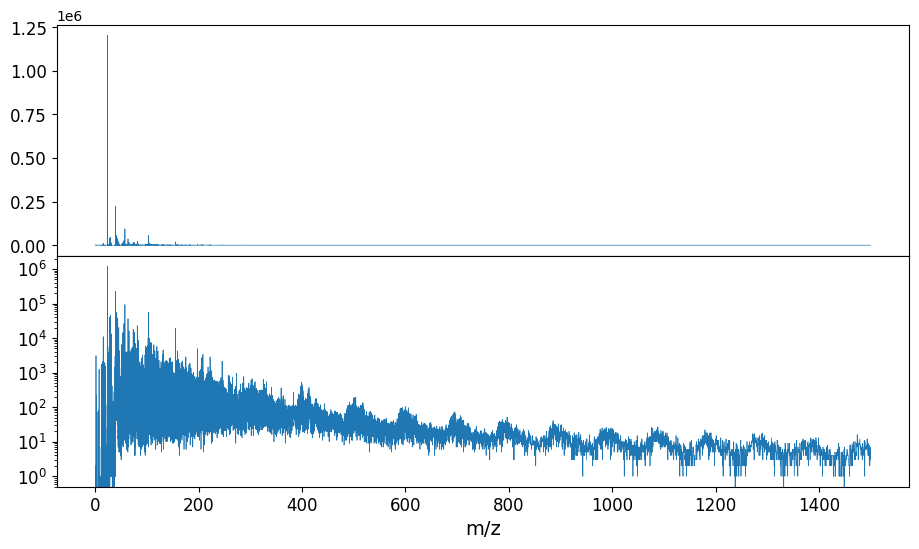

In [6]:
spectra = pd.read_csv("spectrum txt cleaned/P_HEA 1.2_Bi5_3.txt", sep='\t', skiprows=3, usecols=[1, 2], names=['mz', 'intensity'])

figure, axis = plt.subplots(2, 1, figsize=(11, 6)) 

axis[0].plot(spectra["mz"], spectra["intensity"], linewidth = 0.5)
axis[0].ticklabel_format(axis = "y", style = "sci")
axis[0].set_yscale("linear")
axis[0].set_xticklabels([])
axis[0].get_xaxis().set_visible(False)
axis[0].tick_params(axis='y', labelsize=12)


axis[1].plot(spectra["mz"], spectra["intensity"], linewidth = 0.5)
axis[1].set_yscale("log")

plt.xlabel("m/z", size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplots_adjust(hspace=0.0)
plt.savefig("raw_spectra", dpi=700, bbox_inches='tight')

Text(0, 0.5, 'Counts')

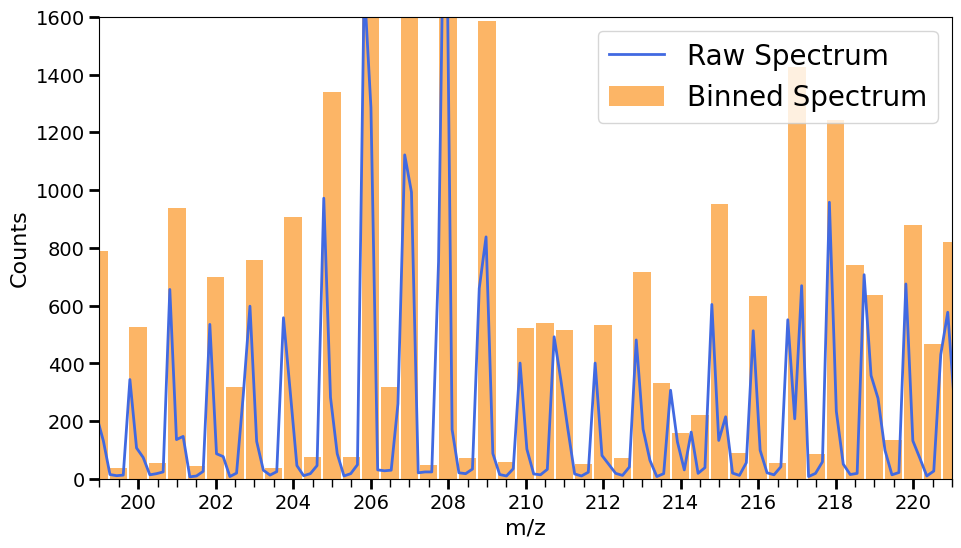

In [3]:

raw = pd.DataFrame({"mz": spectra.mz, "intensity": spectra.intensities})
binned = pd.DataFrame({"mz": spectra.bin_mz, "intensity": spectra.bin_intensities})

fig, ax = plt.figure(figsize = (11,6)) , plt.gca()

plt.plot(raw.mz, raw.intensity, label = "Raw Spectrum", color = "royalblue", linewidth = 2)
plt.bar(binned.mz, binned.intensity, label = "Binned Spectrum", alpha = 0.6, width=0.45, color = "#fb8500")
plt.xlim(199,221)
plt.ylim(0,1600)
plt.legend(prop={'size': 20})
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))

ax.tick_params(axis='both', which='major', labelsize=14, length=7, width=2)  # Major ticks
ax.tick_params(axis='both', which='minor', labelsize=14, length=6, width=1)  # Minor ticks

# Adding labels and customizing their size
ax.set_xlabel("m/z", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)

#plt.savefig("binned_spectrum", dpi=500, bbox_inches='tight')

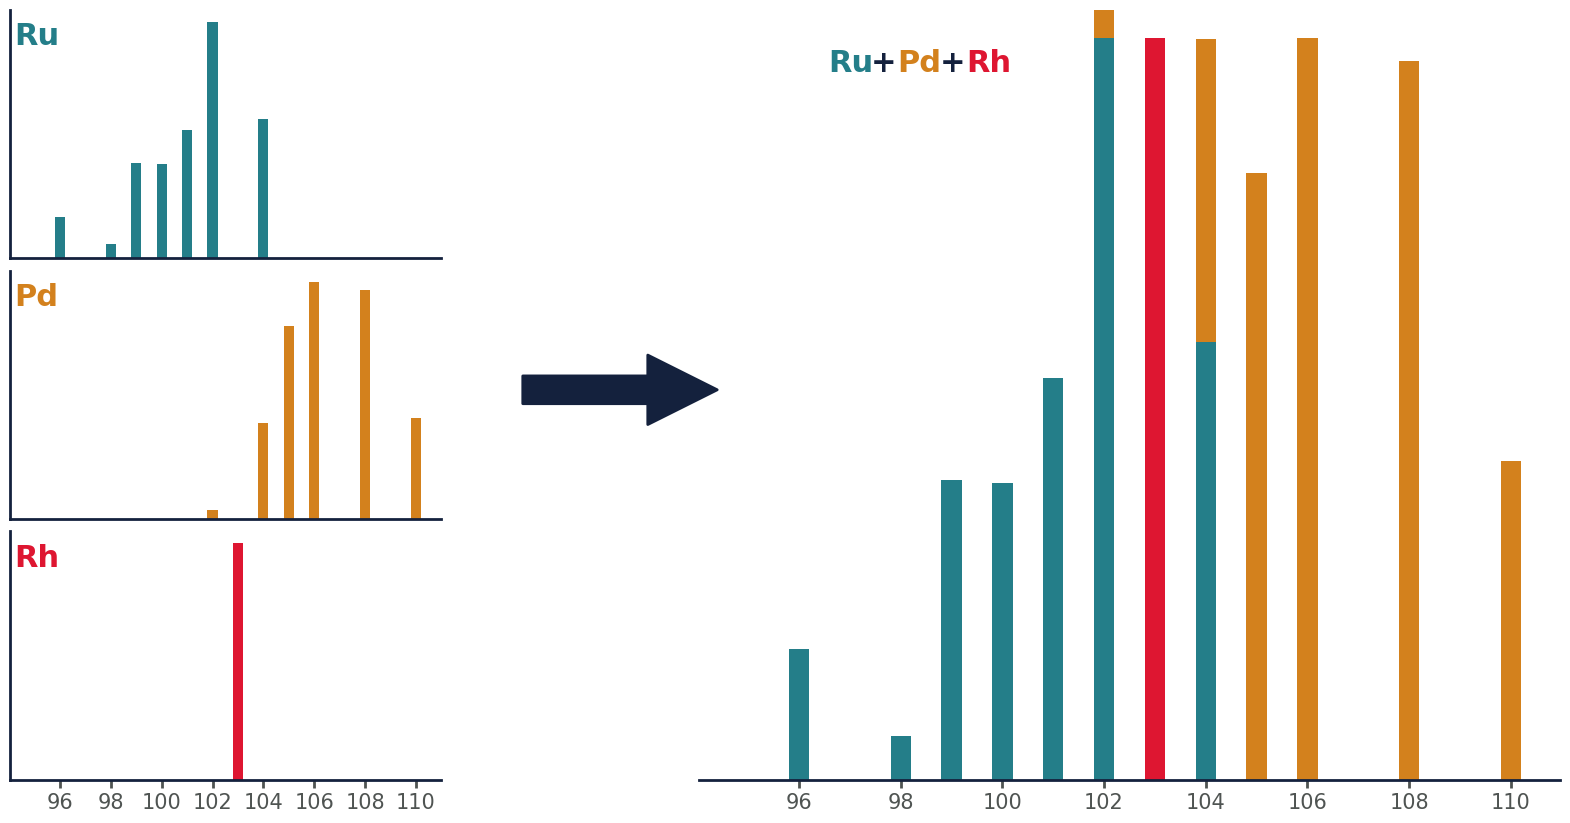

In [7]:

from matplotlib.patches import FancyArrowPatch

isotope_df = pd.DataFrame({"bin_mz": np.arange(95, 110.5, 0.5)})

df_list = [
    pd.DataFrame({"mz" : Element("Pd", count = 1).isotopic_weight, "Pd" : Element("Pd", count = 1).isotopic_ratios}),
    pd.DataFrame({"mz" : Element("Ru", count = 1).isotopic_weight, "Ru" : Element("Ru", count = 1).isotopic_ratios}),
    pd.DataFrame({"mz" : Element("Rh", count = 1).isotopic_weight, "Rh" : Element("Rh", count = 1).isotopic_ratios}),
           ]

for df in df_list:
    df.iloc[:, 1] = df.iloc[:, 1]/df.iloc[:, 1].max()
    # Binning the isotopic distribution
    df["bin_mz"] = np.round(df.mz * 0.5**(-1)) * 0.5
    bin_distribution_df = df.groupby("bin_mz").max().reset_index().drop("mz", axis=1)
    isotope_df = pd.merge(isotope_df, bin_distribution_df, how="left", on = "bin_mz")

isotope_df = isotope_df.fillna(0)

# Create a figure with a custom grid layout
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2], wspace=0.4)

# Create the first three subplots stacked vertically in the first column
gs_left = gs[0, 0].subgridspec(3, 1, hspace=0.05)
ax0 = fig.add_subplot(gs_left[0])
ax1 = fig.add_subplot(gs_left[1])
ax2 = fig.add_subplot(gs_left[2])

# Create the fourth subplot in the second column
ax3 = fig.add_subplot(gs[0, 1])

# Plot the data in the first three subplots
ax0.bar(isotope_df.bin_mz, isotope_df.Ru, width=0.4, alpha=1, label="Ru", color = "#247e89")
ax1.bar(isotope_df.bin_mz, isotope_df.Pd, width=0.4, alpha=1, label="Pd", color = "#D3811D")
ax2.bar(isotope_df.bin_mz, isotope_df.Rh, width=0.4, alpha=1, label="Rh", color = "#DE1631")

# Add multicolored text to the top left corner of the right subplot
ax3.text(0.15 , 0.95, 'Ru', transform=ax3.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color='#247e89')
ax3.text(0.2 , 0.95, '+',  transform=ax3.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color='#14213d')
ax3.text(0.23, 0.95, 'Pd', transform=ax3.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color='#D3811D')
ax3.text(0.28, 0.95, '+',  transform=ax3.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color='#14213d')
ax3.text(0.31, 0.95, 'Rh', transform=ax3.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color='#DE1631')

# Add text to the top left corner of each subplot in the left column
ax0.text(0.01, 0.95, 'Ru', transform=ax0.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color = "#247e89")
ax1.text(0.01, 0.95, 'Pd', transform=ax1.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color = "#D3811D")
ax2.text(0.01, 0.95, 'Rh', transform=ax2.transAxes, fontsize=22, verticalalignment='top', fontweight = "bold", color = "#DE1631")

# Remove y-axis labels for the first three subplots
ax0.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

# Remove x-axis labels for the first two subplots
ax0.get_xaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)

# Customize x-axis for the third subplot
ax2.xaxis.set_major_locator(MultipleLocator(2))
#ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.tick_params(axis='x', which='major', labelsize=15, length=6, width=2)  # Major ticks
ax2.tick_params(axis='x', which='minor', labelsize=10, length=5, width=1)  # Minor ticks

ax3.xaxis.set_major_locator(MultipleLocator(2))
#ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
ax3.tick_params(axis='x', which='major', labelsize=15, length=6, width=2)  # Major ticks
ax3.tick_params(axis='x', which='minor', labelsize=10, length=5, width=1)  # Minor ticks

# Plot something in the fourth subplot (dummy data used for example)
ax3.bar(isotope_df.bin_mz, isotope_df.Ru, width=0.4, alpha=1, label='Ru', color='#247e89')
ax3.bar(isotope_df.bin_mz, isotope_df.Pd, width=0.4, alpha=1, label='Pd', color='#D3811D', bottom=isotope_df.Ru)
ax3.bar(isotope_df.bin_mz, isotope_df.Rh, width=0.4, alpha=1, label='Rh', color='#DE1631', bottom=isotope_df.Ru + isotope_df.Pd)


# Remove the spines (box) around the right subplot
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for ax in [ax0, ax1, ax2, ax3]:
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # Set the thickness
        spine.set_edgecolor('#14213d')  # Set the color
       
    ax.tick_params(axis='both', which='both', width=2, color='#6D7471')  # Set tick parameters
    ax.tick_params(axis='x', colors='#4F5452')  # Set x-tick labels to grey


# Add arrow annotation
arrow = FancyArrowPatch((0.38, 0.5), (0.48, 0.5), transform=fig.transFigure,
                         mutation_scale=100, lw=2, color='#14213d')
fig.patches.append(arrow)

plt.subplots_adjust(hspace=0.0)

#plt.savefig("combined_spectra.png", dpi=700, bbox_inches='tight')


Spectra loaded from 'spectrum txt cleaned/P_HEA 1.2_Bi5_1.txt'

Creation of the Isotope DataFrame with ['Ru', 'Rh', 'Pd', 'Pt', 'Ir'] up to 3 indices for the mz range of 0 to 1500


100%|██████████| 762/762 [00:10<00:00, 69.97it/s] 



Isotope DataFrame created, 762 isotopes considered for quantification
Quantification done --> 239 molecules out of 762 where quantified in the spectra
Residual of the fit: 91083

----------------------------------------------------------------------------------------------


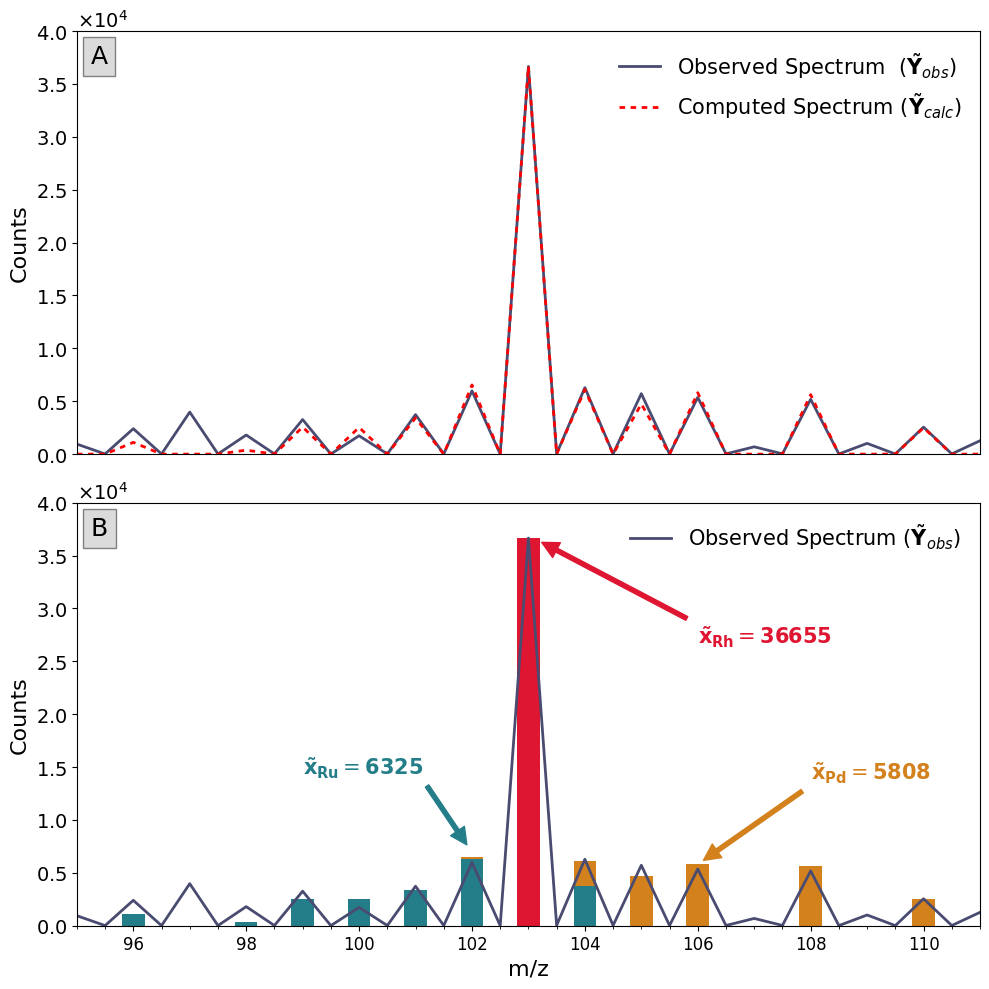

In [11]:
single_element = ["H", "K", "Na", "Cu", "Zn", "Al", "CH3", "C2H5"]
other_elements = []
spectra = SIMS_Spectra("spectrum txt cleaned/P_HEA 1.2_Bi5_1.txt",
                       single_other_component = single_element,
                       indice_max=3,
                       #components= ["Ru", "Pt", "Pd"],
                       max_molecules=4,
                       other_elements= other_elements)

xlim = (95, 111)
index_range = np.where(np.logical_and(spectra.bin_mz >= xlim[0], spectra.bin_mz <= xlim[1]))
bin_mz = spectra.bin_mz[index_range]
bin_spectra = spectra.bin_intensities[index_range]
computed_spectra = spectra.computed_intensities[index_range]

Ru = spectra.individual_molecule_spectra_df["Ru"].values[index_range]
Rh = spectra.individual_molecule_spectra_df["Rh"].values[index_range]
Pd = spectra.individual_molecule_spectra_df["Pd"].values[index_range]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10, 10))

# First subplot: Compare observed spectra and computed spectra
ax1.plot(bin_mz, bin_spectra,linewidth = 2, color ="#494B70", label=r"Observed Spectrum  ($\tilde{\mathbf{Y}}_{obs}$)")
ax1.plot(bin_mz, computed_spectra, color='red', label=r"Computed Spectrum ($\tilde{\mathbf{Y}}_{calc}$)", linewidth=2, linestyle ="--", dashes=(2, 2))
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.get_offset_text().set_fontsize(14)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("Counts", fontsize=16)
ax1.legend(fontsize=15, frameon=False)

# Add annotation "A" to the first subplot
ax1.text(0.025, 0.94, 'A', transform=ax1.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))



# Second subplot: Decomposition of observed spectra into individual elements
ax2.plot(bin_mz, bin_spectra, linewidth=2,  alpha=1, color = "#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
ax2.bar(bin_mz, Ru, width=0.4, alpha=1, color='#247e89')
ax2.bar(bin_mz, Rh, width=0.4, alpha=1, color='#DE1631', bottom=Ru)
ax2.bar(bin_mz, Pd, width=0.4, alpha=1, color='#D3811D', bottom=Ru+Rh)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.tick_params(axis='x', which='major', labelsize=12)
ax2.legend(fontsize=15, frameon=False)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_ylabel("Counts", fontsize=16)
ax2.set_xlabel("m/z", fontsize=16)



# Add annotations with arrows for individual elements in the lower plot
Ru_quantification = spectra.quantification_values[np.where(np.array(spectra.isotopes_str) =="Ru")].item()
Rh_quantification = spectra.quantification_values[np.where(np.array(spectra.isotopes_str) =="Rh")].item()
Pd_quantification = spectra.quantification_values[np.where(np.array(spectra.isotopes_str) =="Pd")].item()

ax2.annotate(r"$\mathbf{\tilde{x}_{Ru}} = $" + f"{Ru_quantification:.0f}" , xy=(bin_mz[14] - 0.05, Ru[14] +1000), xytext=(bin_mz[14] - 3, Ru[14] + 8000),
             arrowprops=dict(facecolor='#247e89', edgecolor='#247e89', shrink=0.05, width = 3), fontsize=15, fontweight = "bold",  color='#247e89')

ax2.annotate(r"$\mathbf{\tilde{x}_{Rh}} = $" +  f"{Rh_quantification:.0f}", xy=(bin_mz[16] + 0.09, Ru[16] + Rh[16] ), xytext=(bin_mz[16] +3 , Ru[16] + Rh[16] - 10000),
             arrowprops=dict(facecolor='#DE1631', edgecolor='#DE1631', shrink=0.05, width = 3), fontsize=15, fontweight = "bold", color='#DE1631')

ax2.annotate(r"$\mathbf{\tilde{x}_{Pd}} = $" + f"{Pd_quantification:.0f}", xy=(bin_mz[22], Pd[22]), xytext=(bin_mz[22] + 2, Pd[22] + 8000),
             arrowprops=dict(facecolor='#D3811D', edgecolor='#D3811D', shrink=0.05, width = 3), fontsize=15, fontweight = "bold", color='#D3811D')

# Add annotation "B" to the second subplot
ax2.text(0.025, 0.94, 'B', transform=ax2.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))

# Adjust layout
plt.ylim(0, 40000)
plt.xlim(95, 111)
plt.tight_layout()

plt.savefig("quantifications.png", dpi=700, bbox_inches='tight')

In [6]:
single_element = ["H", "K", "Na", "Cu", "Zn", "Al", "CH3", "C2H5"]
other_elements = []
spectra = SIMS_Spectra("spectrum txt cleaned/P_HEA19_Bi5_1.txt",
                       single_other_component = single_element,
                       indice_max=3,
                       #components= ["Ru", "Pt", "Pd"],
                       max_molecules=4,
                       other_elements= other_elements)


Spectra loaded from 'spectrum txt cleaned/P_HEA19_Bi5_1.txt'

Creation of the Isotope DataFrame with ['Ru', 'Rh', 'Pd', 'Pt', 'Ir'] up to 3 indices for the mz range of 0 to 1800


100%|██████████| 788/788 [00:12<00:00, 64.25it/s] 



Isotope DataFrame created, 788 isotopes considered for quantification
Quantification done --> 285 molecules out of 788 where quantified in the spectra
Residual of the fit: 325207

----------------------------------------------------------------------------------------------


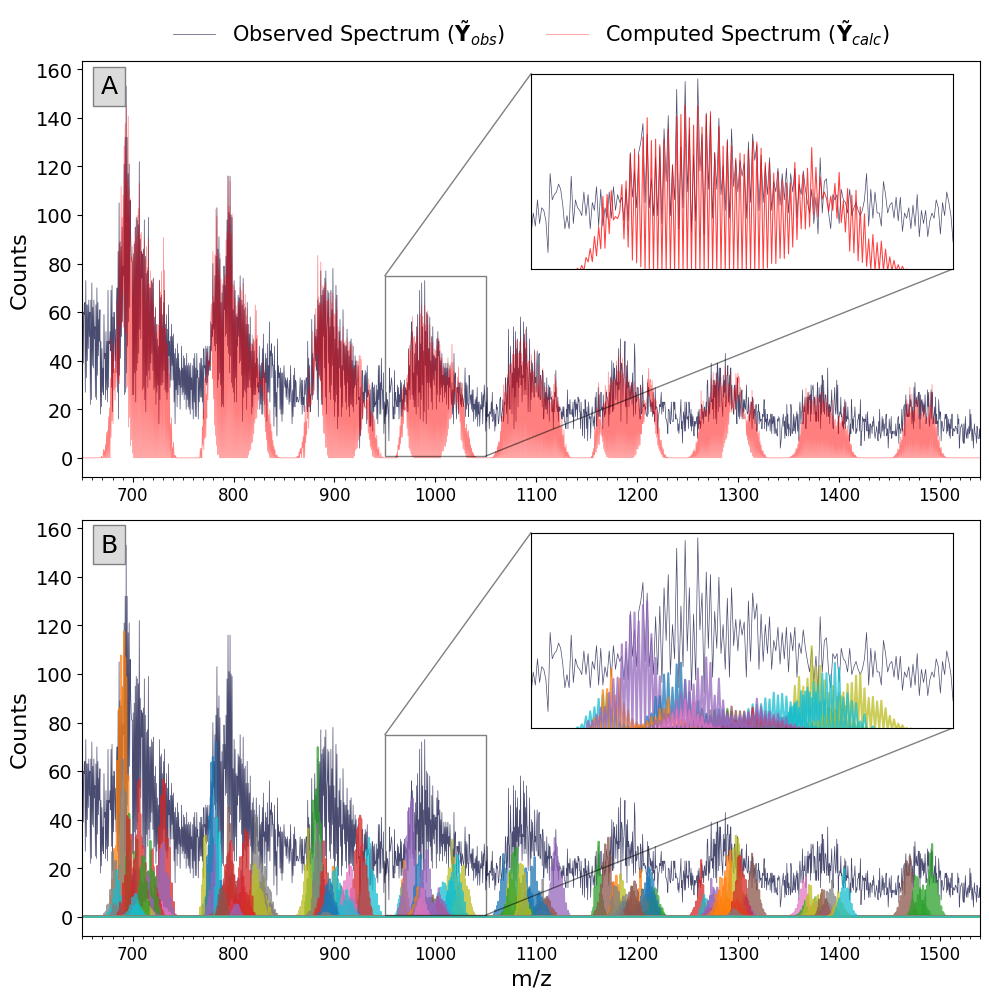

In [11]:
from scipy.signal import savgol_filter
xlim = (650, 1540)
index_range = np.where(np.logical_and(spectra.bin_mz >= xlim[0], spectra.bin_mz <= xlim[1]))
bin_mz = spectra.bin_mz[index_range]
bin_spectra = spectra.bin_intensities[index_range]
computed_spectra = spectra.computed_intensities[index_range]
df = spectra.individual_molecule_spectra_df.iloc[index_range]
df = df.iloc[:, (df !=0).any().values]

# Apply Savitzky-Golay filter
background_estimation = savgol_filter(bin_spectra, window_length=101, polyorder=2)
scaling_factor = 0.6  # Adjust this value as needed
background_estimation *= scaling_factor

# Replace null values with the corresponding background values
#computed_spectra = np.where(computed_spectra < background_estimation, background_estimation, computed_spectra)

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=True, figsize=(10, 10))

# First subplot: Compare observed spectra and computed spectra
ax1.plot(bin_mz, bin_spectra,linewidth = 0.5, color ="#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
ax1.plot(bin_mz, computed_spectra, color='red', label=r"Computed Spectrum ($\tilde{\mathbf{Y}}_{calc}$)", alpha = 0.5, linewidth = 0.5)
#ax1.plot(bin_mz, background_estimation, color='green', label=r"Background Estimation", linewidth=0.5, linestyle="--")
ax1.set_xlim(xlim)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.get_offset_text().set_fontsize(14)
ax1.get_xaxis().set_visible(True)
ax1.set_ylabel("Counts", fontsize=16)
ax1.legend(fontsize=15, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15),  ncol =5)

# Define the x-axis limits for the inset plot
inset_xlim = (950, 1050)

# Filter the data for the inset plot
inset_index_range = np.where(np.logical_and(bin_mz >= inset_xlim[0], bin_mz <= inset_xlim[1]))
inset_bin_mz = bin_mz[inset_index_range]
inset_bin_spectra = bin_spectra[inset_index_range]
inset_computed_spectra = computed_spectra[inset_index_range]

# Create the inset plot for the first subplot
axins1 = ax1.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = inset_xlim, ylim = (0.75, 75))
axins1.plot(inset_bin_mz, inset_bin_spectra, linewidth=0.5, color="#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
axins1.plot(inset_bin_mz, inset_computed_spectra, color='red', label=r"Computed Spectrum ($\tilde{\mathbf{Y}}_{calc}$)", alpha = 0.75, linewidth = 0.75)
axins1.yaxis.set_visible(False)
axins1.xaxis.set_visible(False)
ax1.indicate_inset_zoom(axins1, edgecolor="black")

# Add annotation "A" to the first subplot
ax1.text(0.03, 0.94, 'A', transform=ax1.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))


# Second subplot: Decomposition of observed spectra into individual elements
ax2.plot(bin_mz, bin_spectra, linewidth=0.5,  alpha=1, color = "#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
for column in df.columns[1:]:
    
    ax2.plot(bin_mz, df[column], label=column, alpha = 0.75)

ax2.xaxis.set_major_locator(MultipleLocator(100))
ax2.xaxis.set_minor_locator(AutoMinorLocator(10))
ax2.tick_params(axis='x', which='major', labelsize=12)
#ax2.legend(fontsize=15, frameon=False)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_ylabel("Counts", fontsize=16)
ax2.set_xlabel("m/z", fontsize=16)


# Add annotation "B" to the second subplot
ax2.text(0.03, 0.94, 'B', transform=ax2.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))

# Define the x-axis limits for the inset plot
inset_xlim = (950, 1050)

# Filter the data for the inset plot
inset_index_range = np.where(np.logical_and(bin_mz >= inset_xlim[0], bin_mz <= inset_xlim[1]))
inset_bin_mz = bin_mz[inset_index_range]
inset_bin_spectra = bin_spectra[inset_index_range]
inset_df = df.iloc[inset_index_range]
bottom_values = np.zeros_like(inset_bin_mz)

# Create the inset plot
axins = ax2.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = inset_xlim, ylim = (0.75, 75), yticklabels=[], yticks = [])
axins.yaxis.set_visible(False)
axins.xaxis.set_visible(False)
axins.plot(inset_bin_mz, inset_bin_spectra, linewidth=0.5, alpha=1, color="#494B70", label=r"Observed Spectrum ($\mathbf{Y}$)")
for column in inset_df.columns[1:]:
    axins.plot(inset_bin_mz, inset_df[column], label=column, alpha=0.75)
    #axins.bar(inset_bin_mz, inset_df[column], label=column, alpha=0.75, bottom=bottom_values)
    #bottom_values += inset_df[column]

# Adjust layout
ax2.indicate_inset_zoom(axins, edgecolor="black")

plt.xlim(xlim[0], xlim[1])
plt.tight_layout()
#plt.savefig("quantifications_subplots.png", dpi=700, bbox_inches='tight')

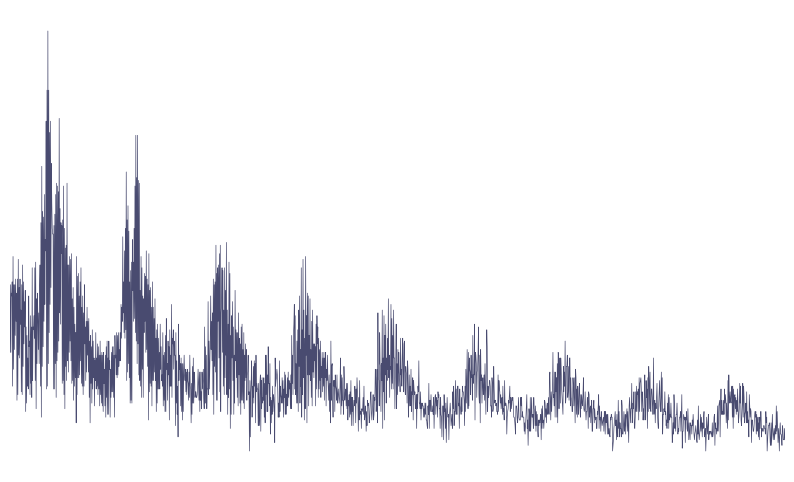

In [27]:
xlim = (650, 1540)
index_range = np.where(np.logical_and(spectra.bin_mz >= xlim[0], spectra.bin_mz <= xlim[1]))
bin_mz = spectra.bin_mz[index_range]
bin_spectra = spectra.bin_intensities[index_range]
computed_spectra = spectra.computed_intensities[index_range]
df = spectra.individual_molecule_spectra_df.iloc[index_range]
df = df.iloc[:, (df != 0).any().values]

fig, ax1 = plt.subplots(figsize=(5, 3))

# First subplot: Compare observed spectra and computed spectra
ax1.plot(bin_mz, bin_spectra, linewidth=0.5, color="#494B70", label=r"Observed Spectra ($\tilde{\mathbf{Y}}_{obs}$)")
ax1.set_xlim(xlim)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
#ax1.set_ylabel("Counts", fontsize=20)
#ax1.set_xlabel("m/z", fontsize=22)

# Increase the width and change the color of the bottom and left axes, remove the top and right axes
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#354355')  # Change to desired color
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#354355')  # Change to desired color

# Set the background of the plot to be transparent
ax1.patch.set_alpha(0)  # Set the axis background to transparent
fig.patch.set_alpha(0)  # Set the figure background to transparent
plt.savefig("GA_plot1.png", dpi=900, bbox_inches='tight', transparent=True)

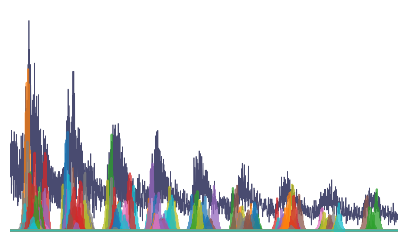

In [26]:
xlim = (650, 1540)
index_range = np.where(np.logical_and(spectra.bin_mz >= xlim[0], spectra.bin_mz <= xlim[1]))
bin_mz = spectra.bin_mz[index_range]
bin_spectra = spectra.bin_intensities[index_range]
computed_spectra = spectra.computed_intensities[index_range]
df = spectra.individual_molecule_spectra_df.iloc[index_range]
df = df.iloc[:, (df != 0).any().values]

fig, ax1 = plt.subplots(figsize=(5, 3))

ax1.plot(bin_mz, bin_spectra, linewidth=0.5,  alpha=1, color = "#494B70", label=r"Observed Spectra ($\tilde{\mathbf{Y}}_{obs}$)")
for column in df.columns[1:]:
    
    ax1.plot(bin_mz, df[column], label=column, alpha = 0.75)

ax1.set_xlim(xlim)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Increase the width and change the color of the bottom and left axes, remove the top and right axes
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#354355')  # Change to desired color
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#354355')  # Change to desired color

# Set the background of the plot to be transparent
ax1.patch.set_alpha(0)  # Set the axis background to transparent
fig.patch.set_alpha(0)  # Set the figure background to transparent
plt.savefig("GA_plot2.png", dpi=900, bbox_inches='tight', transparent=True)